# Simulate Dirichlet process mixture data
Simulate Dirichlet process mixture data

So I am setting the max number of clusters K to 1000 and selecting a gasussian distribution as the base measure $P_0$

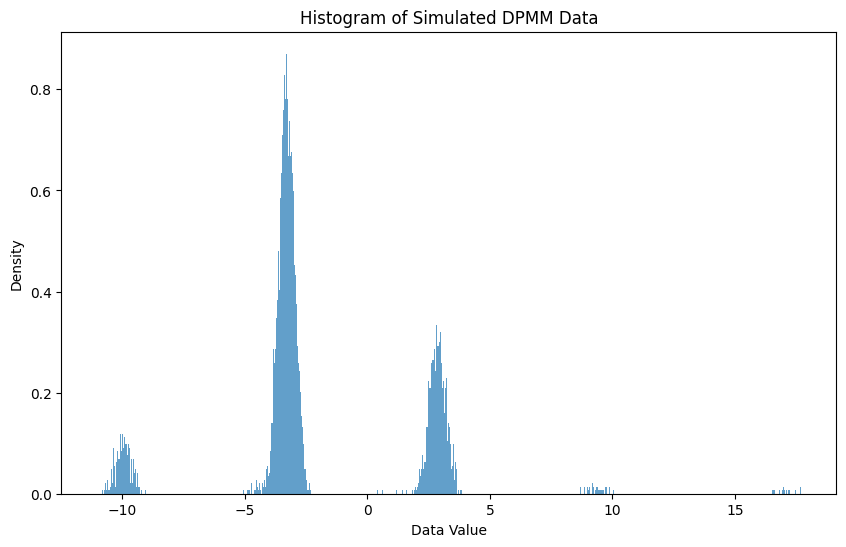

9

In [4]:
import numpy as np
import matplotlib.pyplot as plt

np.random.seed(4643) # for reproduce

def stick_breaking(alpha, K=1000): #truncating the Dirichlet process to a large but finite number
    betas = np.random.beta(1, alpha, K) # Sampling V's in the slides
    remaining_stick_lengths = np.cumprod(1 - betas) # computing the remaing weight for each k, later times with the V's to produce the weight. Slieds p18
    weights = betas * np.concatenate(([1], remaining_stick_lengths[:-1])) # The firs cluster get a full stick, so we add 1 to it. And we drops the last one to maitain the length.
    return weights # results sum up t0 1

def simulate_DPMM(alpha, base_mean, base_variance, data_variance, N):
    # Generate cluster weights
    weights = stick_breaking(alpha)
    
    # Sample cluster assignments
    cluster_assignments = np.random.choice(len(weights), size=N, p=weights)
    
    # Generate cluster parameters from the base distribution
    cluster_means = np.random.normal(base_mean, np.sqrt(base_variance), size=len(weights))
    
    # Generate observations
    observations = np.random.normal(cluster_means[cluster_assignments], np.sqrt(data_variance), size=N)
    
    return observations, cluster_assignments, cluster_means

# Parameters
alpha = 1 # Concentration parameter
base_mean = 0.0  # Mean of the base distribution for the cluster means
base_variance = 100 # Variance of the base distribution for the cluster means
data_variance = 0.1  # Variance of the data points within clusters
N = 5000  # Number of data points

# Simulate data
observations, cluster_assignments, cluster_means = simulate_DPMM(alpha, base_mean, base_variance, data_variance, N)

# Plotting
plt.figure(figsize=(10, 6))
plt.hist(observations, bins=1000, alpha=0.7, density=True)
plt.title("Histogram of Simulated DPMM Data")
plt.xlabel("Data Value")
plt.ylabel("Density")
plt.show()

# Show the number of unique clusters realized
num_clusters = len(np.unique(cluster_assignments))
num_clusters

In [2]:
np.unique(cluster_assignments)

array([0, 1, 2, 3, 4, 5, 6, 7, 8])

In [3]:
np.savetxt("data.csv", observations, delimiter=",")